In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import openturns as ot

import otagrum as otagr

In [2]:
bn=gum.fastBN("0->1->2->3<-0;1->4")
ie=gum.LazyPropagation(bn)
jt=ie.junctionTree()
gnb.sideBySide(bn,jt)

G <!-- 0 --> 0 0 <!-- 1 --> 1 1 <!-- 0->1 --> 0->1 <!-- 3 --> 3 3 <!-- 0->3 --> 0->3 <!-- 2 --> 2 2 <!-- 1->2 --> 1->2 <!-- 4 --> 4 4 <!-- 1->4 --> 1->4 <!-- 2->3 --> 2->3


In [2]:
# génération du sample origine
R=ot.CorrelationMatrix(5)
for i in range(5):
    for j in range(i):
        R[i,j]=0.8
sample=ot.Normal([0]*5,[1]*5,R).getSample(5000)


#calcul de K (using ContinuousTTest.GetK)
dimmax=3 #max([len(list(jt.clique(s))) for s in jt.nodes()])
K=int(1.0 + sample.getSize()**( 2.0 / (4.0 + dimmax)))


# génération du jtbc
#ojt=otagr.JunctionTree(jt,bn.names())
bn=gum.fastBN("A->B->C->D<-A;D->E")
jtg=gum.JunctionTreeGenerator()
njt=otagr.NamedJunctionTree(jtg.junctionTree(bn),bn)
jtbc=otagr.JunctionTreeBernsteinCopula(njt,sample,K,False)

In [3]:
from utils import learn

jtbcsample=jtbc.getSample(5000)
sample2=ot.MarginalTransformationEvaluation([ot.Normal()]*5,ot.MarginalTransformationEvaluation.TO)(jtbcsample)

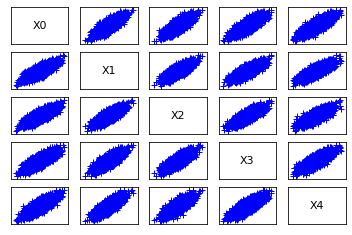

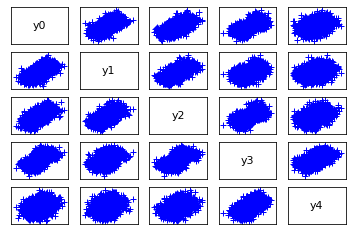

In [4]:
ot.Show(ot.Pairs(sample))
ot.Show(ot.Pairs(sample2))

In [7]:
gnb.sideBySide(bn,jt)

G <!-- 0 --> 0 0 <!-- 1 --> 1 1 <!-- 0->1 --> 0->1 <!-- 3 --> 3 3 <!-- 0->3 --> 0->3 <!-- 2 --> 2 2 <!-- 1->2 --> 1->2 <!-- 4 --> 4 4 <!-- 1->4 --> 1->4 <!-- 2->3 --> 2->3


In [28]:
bn.names()

['A', 'B', 'C', 'D', 'E']

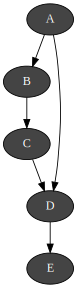

In [8]:
gnb.showBN(bn)